In [1]:
# Import dependencies
import pandas as pd
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt

In [27]:
# File name to ouput
output_data_file = "small_sample_wti.csv"

In [2]:
# Import and read CSV file
wti_csv = "WTI_Crude_Oil.csv"
wti_df = pd.read_csv(wti_csv)

In [3]:
# Append a new date format 
new_date = []
for dates in wti_df['Dates']:
    s = dt.datetime.strptime(dates, '%Y-%m-%d')
    new_date.append(s)
#print(new_date)

se = pd.Series(new_date)

wti_df['New Date'] = se.values

wti_df.head()

,WTI Crude Oil,Dates,Last Price,New Date
0,0,2018-10-31,64.86,2018-10-31
1,1,2018-10-30,66.35,2018-10-30
2,2,2018-10-29,66.69,2018-10-29
3,3,2018-10-26,67.62,2018-10-26
4,4,2018-10-25,66.97,2018-10-25


In [4]:
# Reorganize DataFrame
items_pd = pd.DataFrame(wti_df, columns=[
                        "New Date", "Last Price"])
items_pd.head()

,New Date,Last Price
0,2018-10-31,64.86
1,2018-10-30,66.35
2,2018-10-29,66.69
3,2018-10-26,67.62
4,2018-10-25,66.97


In [5]:
# Try to use the loc function in order to reduce sample size
start_date = '2017-11-01'
end_date = '2018-10-31'
mask = (items_pd['New Date'] > start_date) & (items_pd['New Date'] <= end_date)

items_pd.loc[mask]

df = items_pd.loc[mask]

df.count()

New Date      251
Last Price    251
dtype: int64

In [28]:
# Output to CSV file
df.to_csv(output_data_file, index_label="WTI")

<IPython.core.display.Javascript object>


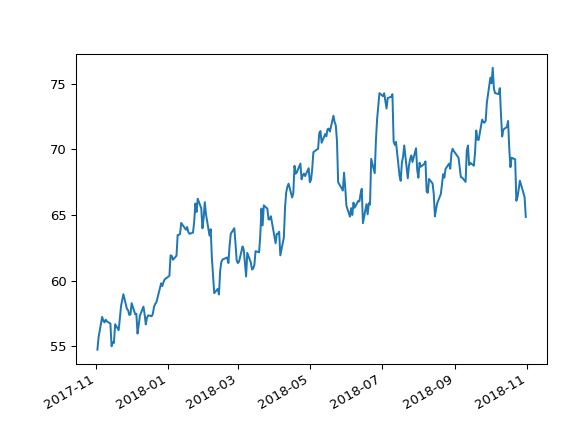

In [6]:
# Quick overview plotting data
fig, ax = plt.subplots()
ax.plot(df['New Date'], df['Last Price'])
fig.autofmt_xdate()

In [7]:
# Create and sort new DataFrame
freedom_df = df.sort_values("New Date")
freedom_df.head()

,New Date,Last Price
250,2017-11-02,54.74
249,2017-11-03,55.70
248,2017-11-06,57.24
247,2017-11-07,56.94
246,2017-11-08,56.82


In [8]:
# Calculate percentage return
price = freedom_df['Last Price']
daily_return = price.pct_change(1)
daily_return.head()

250         NaN
249    0.017537
248    0.027648
247   -0.005241
246   -0.002107
Name: Last Price, dtype: float64

In [9]:
# Append new serie to existing DataFrame
new = pd.Series(daily_return)

freedom_df['Daily Return'] = new.values

freedom_df.head()

,New Date,Last Price,Daily Return
250,2017-11-02,54.74,NaN
249,2017-11-03,55.70,0.017537
248,2017-11-06,57.24,0.027648
247,2017-11-07,56.94,-0.005241
246,2017-11-08,56.82,-0.002107


In [12]:
# Drop N/A
freedom_df.dropna(inplace=True)
freedom_df

,New Date,Last Price,Daily Return
249,2017-11-03,55.70,0.017537
248,2017-11-06,57.24,0.027648
247,2017-11-07,56.94,-0.005241
246,2017-11-08,56.82,-0.002107
245,2017-11-09,57.03,0.003696
244,2017-11-10,56.90,-0.002280
243,2017-11-13,56.73,-0.002988
242,2017-11-14,55.00,-0.030495
241,2017-11-15,55.31,0.005636
240,2017-11-16,55.26,-0.000904


<IPython.core.display.Javascript object>


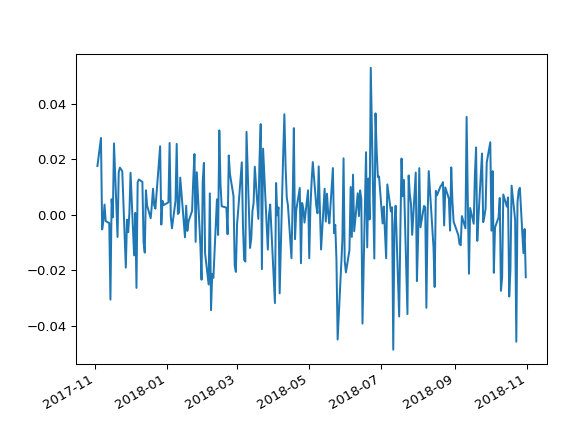

In [21]:
# Plot returns
fig, ax1 = plt.subplots()
ax1.plot(freedom_df['New Date'], freedom_df['Daily Return'])
fig.autofmt_xdate()

<IPython.core.display.Javascript object>


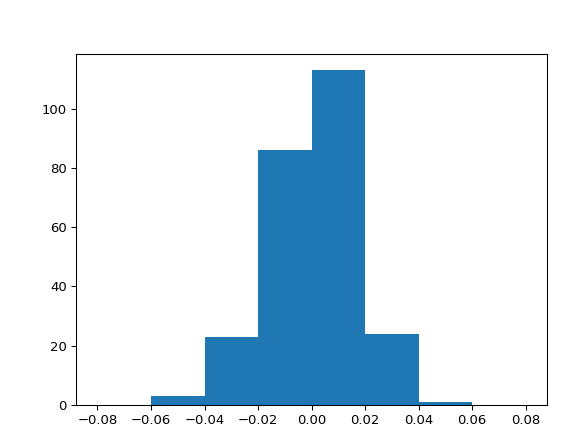

(array([  0.,   3.,  23.,  86., 113.,  24.,   1.,   0.]),
 array([-0.08, -0.06, -0.04, -0.02,  0.  ,  0.02,  0.04,  0.06,  0.08]),
 <a list of 8 Patch objects>)

In [24]:
# Plot into histogram in order to see the distribution of the returns
fig, ax2 = plt.subplots()
auto = [-0.08,-0.06,-0.04,-0.02,0.00,0.02,0.04,0.06,0.08]
ax2.hist(freedom_df['Daily Return'], bins=auto, label="WTI")